predicting nationality by names

In [1]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("names.csv")

In [3]:
df.head()

,Country,Name
0,BR,Hellen Almeida
1,BR,Rafael Lima Lima
2,BR,Gabriel Azevedo
3,BR,Jaison Rodrigues
4,BR,Adriano Manoel


In [4]:
df.groupby('Country')['Name'].size()

Country
BR    99864
CZ    99922
DE    99757
DZ    99905
ES    99706
FR    99883
ID    98794
IN    98667
IQ    99569
IR    99877
JP    97331
MA    97252
MX    99659
PH    98939
RU    99832
TR    99945
US    99393
Name: Name, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Country'])

In [6]:
y

array([ 0,  0,  0, ..., 16, 16, 16])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df['Name'], y, test_size=0.2,random_state=0)
vectorizer = CountVectorizer().fit(x_train)

In [8]:
transformed_x_train = vectorizer.transform(x_train)

In [9]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(transformed_x_train, y_train)

MultinomialNB()

In [10]:
def predict(names, label_str=False):
        name_vector = vectorizer.transform(names)
        pred = clf.predict(name_vector)
        if not label_str:
            return pred
        else:
            return label_encoder.inverse_transform(pred.ravel()).ravel()
        
        
def evaluate(labels, prediction):
        cm = confusion_matrix(labels, prediction)
        # recall
        recall = np.diag(cm) / np.sum(cm, axis = 1)
        # precision
        precision = np.diag(cm) / np.sum(cm, axis = 0)

        acc = (prediction == labels).mean()

        return {'accuracy':acc, 'precision':precision, 'recall':recall}

def plot_confusion( yt, prediction_test):
        cm = confusion_matrix(yt, prediction_test)
        fig = plt.figure(figsize=(15, 10))
        plt.imshow(cm, interpolation='nearest')
        plt.colorbar()
        axis_font = {'size': 13, 'color':'black'}
        cat = label_encoder.classes_
        num_class = len(cat)
        classNames = [cat[i] for i in range(num_class)]
        plt.title("Confusion Matrix by class", fontdict=axis_font)
        plt.ylabel("True Label", fontdict=axis_font)
        plt.xlabel("Predicted Label", fontdict=axis_font)
        tick_marks = np.arange(len(classNames))
        plt.xticks(tick_marks, classNames, rotation=45)
        plt.yticks(tick_marks, classNames)
        fdic = {'size':10, 'color':'white', 'weight':'heavy'}
        for i in range(num_class):
            for j in range(num_class):
                plt.text(j, i, str(cm[i, j]), fontdict=fdic, horizontalalignment='center',verticalalignment='center')
        plt.show()


In [15]:
predict(["ram"],True)

array(['IN'], dtype=object)

In [12]:
y_pred = predict(x_test)

In [13]:
evaluate(y_pred,y_test)

{'accuracy': 0.7230608394859903,
 'precision': array([0.85579184, 0.87334204, 0.62353059, 0.57203815, 0.68339361,
        0.57670242, 0.70702511, 0.85300353, 0.83383504, 0.8726838 ,
        0.67181091, 0.760817  , 0.70896122, 0.56150543, 0.8671143 ,
        0.86546928, 0.40113223]),
 'recall': array([0.78199442, 0.58542417, 0.70920574, 0.65851826, 0.59691997,
        0.73644645, 0.80904289, 0.8310628 , 0.79842429, 0.81182522,
        0.89336606, 0.67138836, 0.56653153, 0.66704675, 0.91546315,
        0.83068427, 0.53730535])}

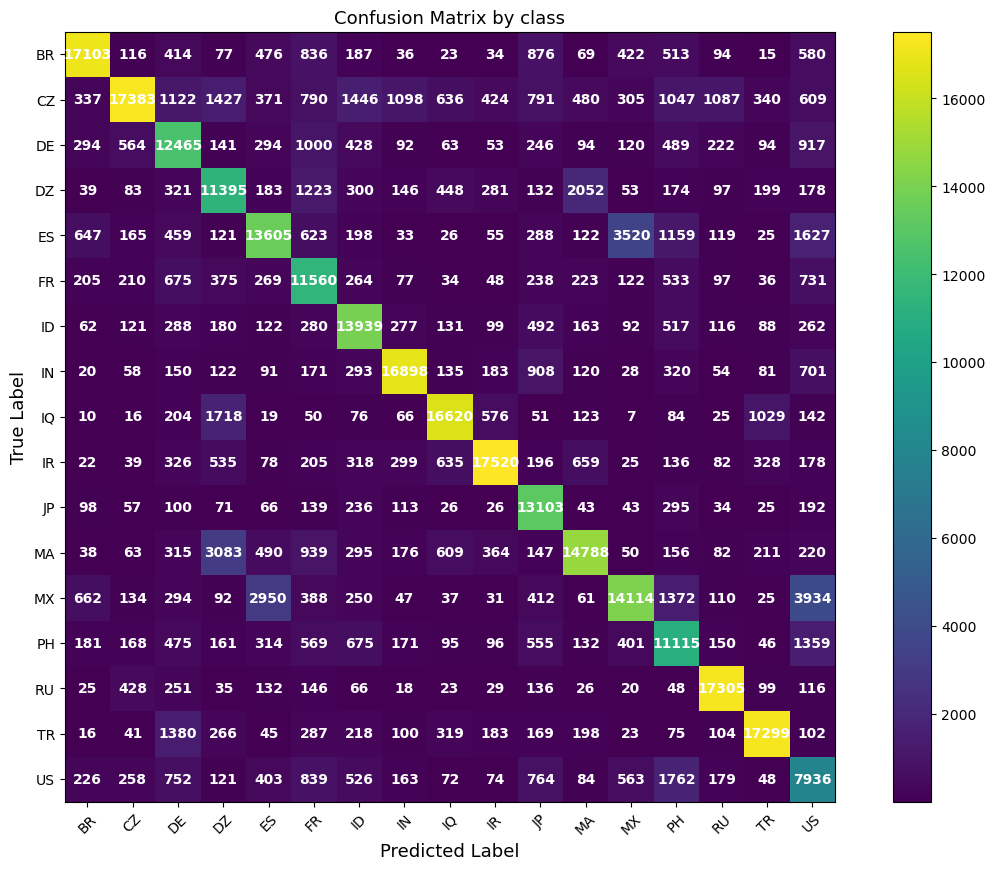

In [14]:
plot_confusion(y_pred,y_test)

In [17]:
i=0
array=['a','b','c','d']
for i in range:
    if(array[i]=='b'):
        print("yes")

TypeError: 'type' object is not iterable